In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objects as go
import warnings




In [3]:
# Suppress warnings
warnings.filterwarnings('ignore')


In [6]:
aids = pd.read_csv('dataset/AIDS_classification.csv')
#aids.drop(columns='Unnamed: 0',inplace=True)

In [8]:
aids.shape

(2139, 23)

In [9]:
aids.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [10]:
pd.set_option('display.max_columns', None)

### Describe the Dataset

In [11]:
aids.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,379.175783,0.288453,0.827957,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,468.657526,0.453149,0.377506,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,142.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,739.500000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2851.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


# Data Preprocessing 

# Check for Null Values

##### as describe below we dont have the any NULL_VAlue in the Aids Dataset

In [12]:
aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

### NO null value in the Dataset

# Spread of Data/Outliers

##### Age , Wtkg , preanti, cd42 , cd420, cd80, cd820 have the most of the outlier 

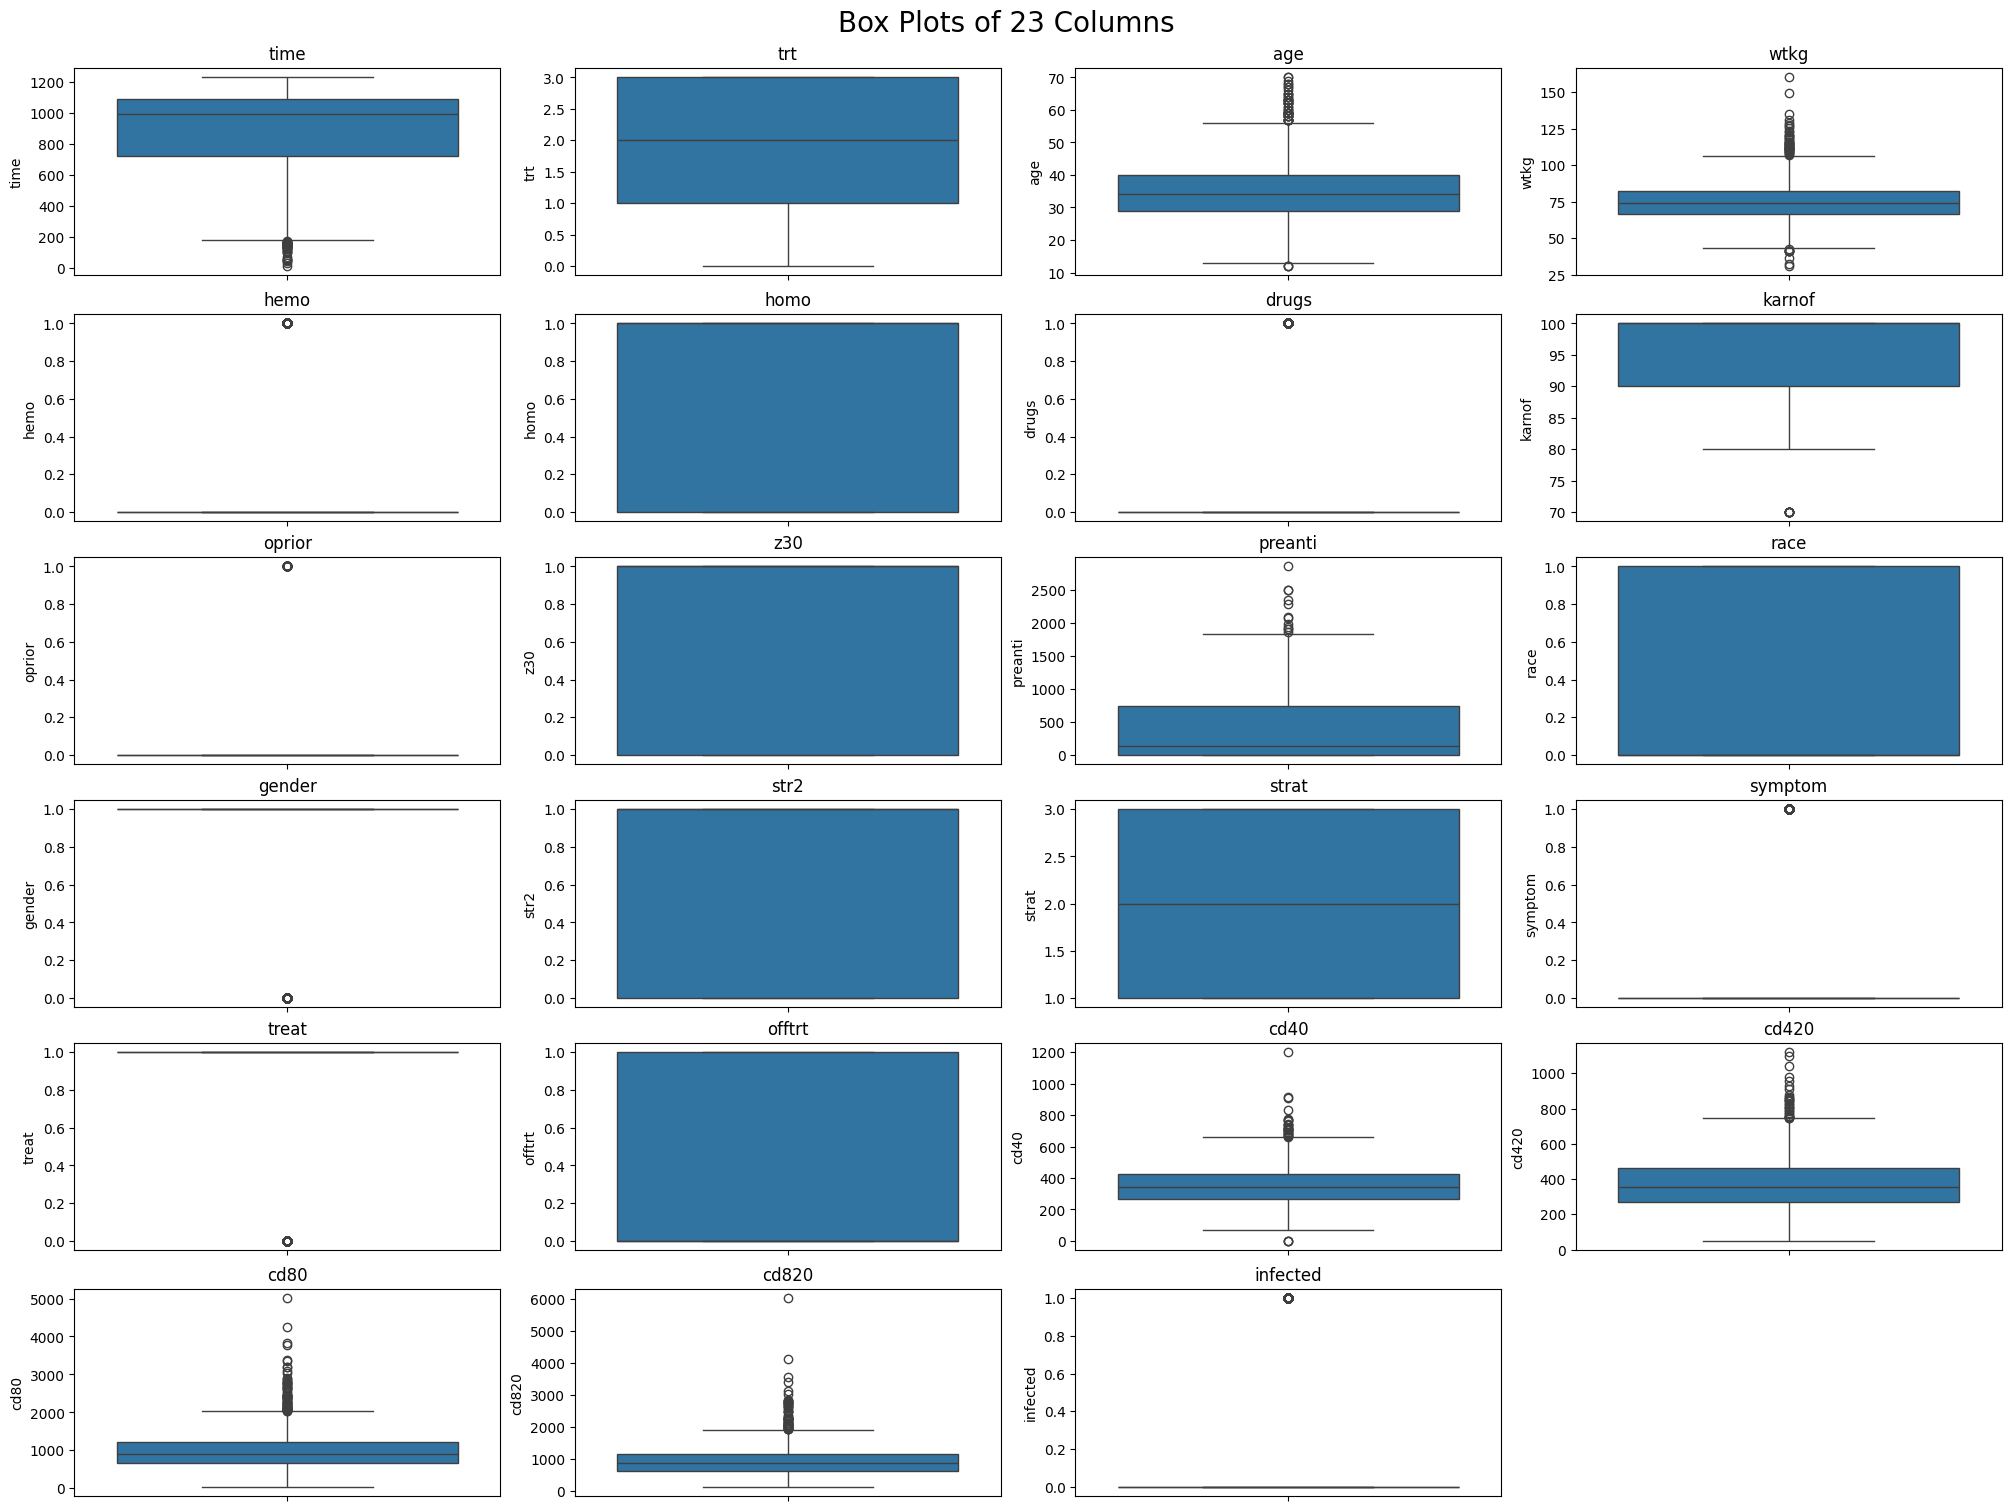

In [13]:
fig, axes = plt.subplots(6, 4, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()  # Flatten the array of axes

# Plot each column in a separate subplot
for i, col in enumerate(aids.columns):
    sns.boxplot(y=aids[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Display the plot
plt.suptitle('Box Plots of 23 Columns', fontsize=20)
plt.show()

# Remove the outliers

In [44]:
columns_with_outliers = ['age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

for column in columns_with_outliers:
    Q1 = aids[column].quantile(0.25)
    Q3 = aids[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = aids[column].median()

    # Replace outliers with the median value
    aids.loc[aids[column] < lower_bound, column] = median
    aids.loc[aids[column] > upper_bound, column] = median

# Print the DataFrame after replacing outliers
aids.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,34,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,887,858,0
3,1166,3,47,85.2768,0,1,0,100,0,1,125,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,125,0,1,1,3,0,0,0,504,353,870,782,0


# After Handling the outliers

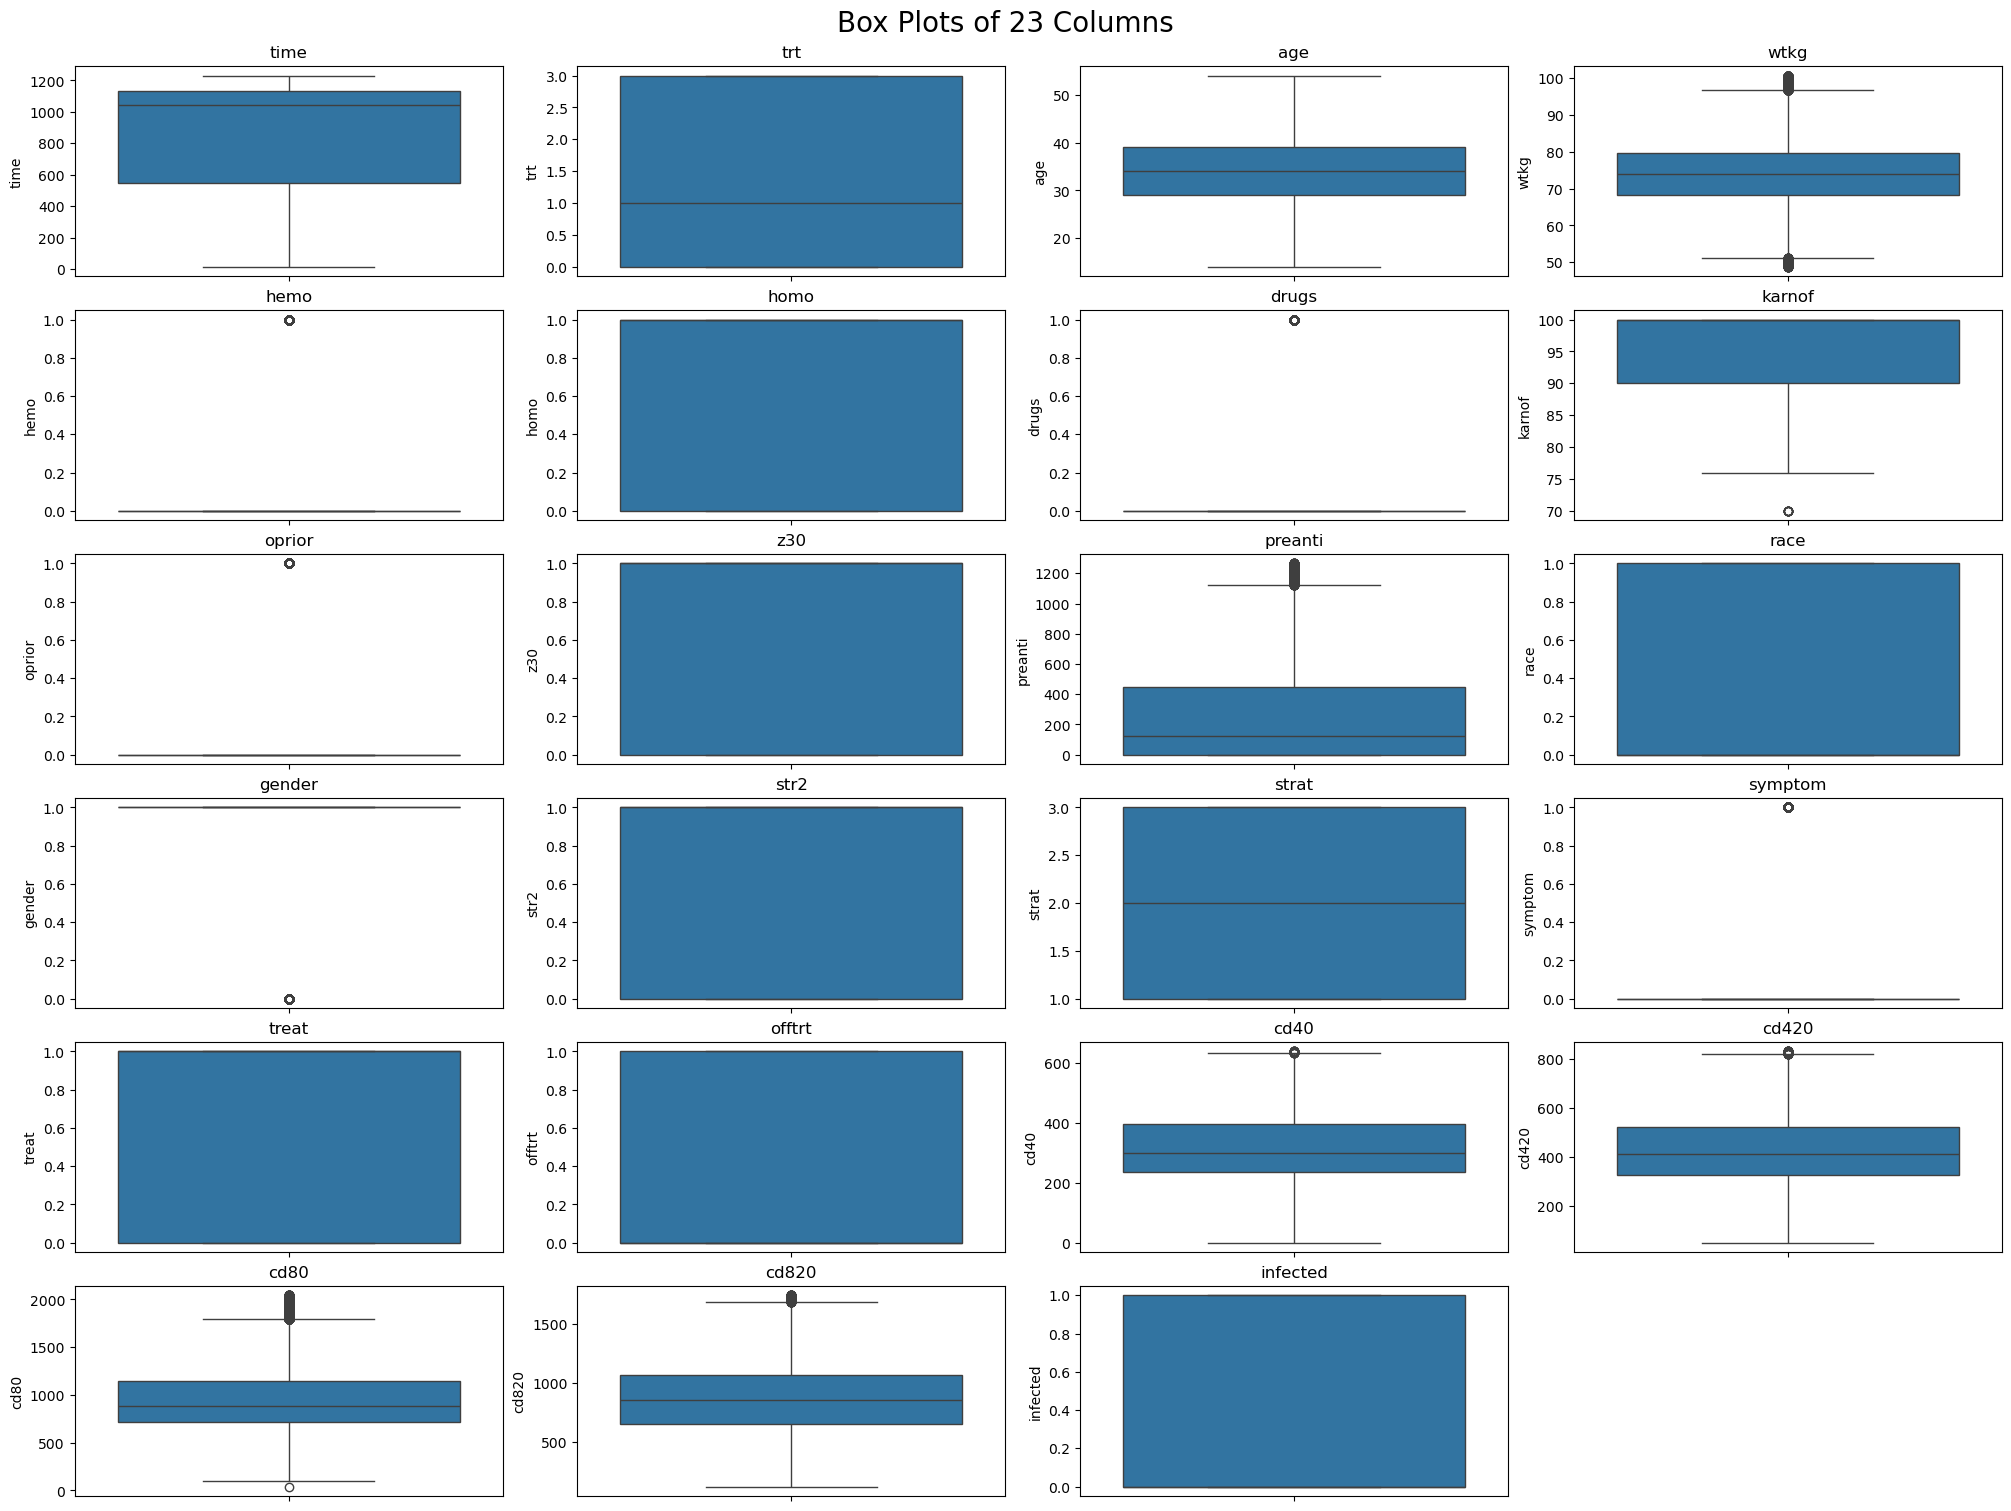

In [45]:
fig, axes = plt.subplots(6, 4, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()  # Flatten the array of axes

# Plot each column in a separate subplot
for i, col in enumerate(aids.columns):
    sns.boxplot(y=aids[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Display the plot
plt.suptitle('Box Plots of 23 Columns', fontsize=20)
plt.show()

# Feature Engineering

> ## Add Bmi Index Column

In [46]:
aids['bmi'] = aids['wtkg'] / (aids['age'] / 100)**2  # Example of a feature engineering step
aids.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,bmi
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0,389.812500
1,1002,3,34,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1,427.702422
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,887,858,0,436.800000
3,1166,3,47,85.2768,0,1,0,100,0,1,125,0,1,1,3,0,1,0,287,394,1590,966,0,386.042553
4,1090,0,43,66.6792,0,1,0,100,0,1,125,0,1,1,3,0,0,0,504,353,870,782,0,360.623039


In [47]:
aids.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,bmi
count,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000
mean,877.563967,1.390358,34.065318,74.324653,0.034641,0.653211,0.131621,96.783543,0.041323,0.639183,276.561347,0.294667,0.854794,0.575833,1.938411,0.086902,0.734901,0.343642,318.419121,431.477107,963.055989,881.056682,0.308252,734.093580
std,306.777676,1.231599,6.808289,9.271658,0.182871,0.475951,0.338080,5.126597,0.199038,0.480241,345.844810,0.455896,0.352311,0.494219,0.895116,0.281693,0.441389,0.474927,100.326023,137.592960,349.090374,293.551966,0.461775,382.079990
min,14.000000,0.000000,14.000000,48.727070,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000,180.927515
25%,545.000000,0.000000,29.000000,68.261090,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,325.000000,713.000000,649.000000,0.000000,488.362133
50%,1043.000000,1.000000,34.000000,74.065720,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,125.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,300.000000,413.000000,887.000000,858.000000,0.000000,633.513131
75%,1135.000000,3.000000,39.000000,79.655075,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,449.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,395.000000,524.000000,1144.000000,1063.000000,1.000000,880.078734
max,1231.000000,3.000000,54.000000,100.709340,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1265.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,638.000000,832.000000,2043.000000,1739.000000,1.000000,4983.520918


In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# After EDa

### label Encoding Categorical Variables

# transform the Skewed Colunns

In [15]:
# Drop original columns after transformation if necessary
aids.drop(['preanti', 'cd40', 'cd420', 'cd80', 'cd820'], axis=1, inplace=True)


# # Scaling numerical features

# PART C

# Exploratory Data Analysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> # Statistical Data Analysis

In [50]:
aids.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,bmi
count,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000
mean,877.563967,1.390358,34.065318,74.324653,0.034641,0.653211,0.131621,96.783543,0.041323,0.639183,276.561347,0.294667,0.854794,0.575833,1.938411,0.086902,0.734901,0.343642,318.419121,431.477107,963.055989,881.056682,0.308252,734.093580
std,306.777676,1.231599,6.808289,9.271658,0.182871,0.475951,0.338080,5.126597,0.199038,0.480241,345.844810,0.455896,0.352311,0.494219,0.895116,0.281693,0.441389,0.474927,100.326023,137.592960,349.090374,293.551966,0.461775,382.079990
min,14.000000,0.000000,14.000000,48.727070,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000,180.927515
25%,545.000000,0.000000,29.000000,68.261090,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,325.000000,713.000000,649.000000,0.000000,488.362133
50%,1043.000000,1.000000,34.000000,74.065720,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,125.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,300.000000,413.000000,887.000000,858.000000,0.000000,633.513131
75%,1135.000000,3.000000,39.000000,79.655075,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,449.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,395.000000,524.000000,1144.000000,1063.000000,1.000000,880.078734
max,1231.000000,3.000000,54.000000,100.709340,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1265.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,638.000000,832.000000,2043.000000,1739.000000,1.000000,4983.520918


> ## Central Tendency

In [51]:
print("\nCentral Tendencies (Mean and Median):")
central_tendencies = aids[['age', 'wtkg', 'cd40', 'cd420', 'cd80', 'cd820']].agg(['mean', 'median'])
print(central_tendencies)


Central Tendencies (Mean and Median):
              age       wtkg        cd40       cd420        cd80       cd820
mean    34.065318  74.324653  318.419121  431.477107  963.055989  881.056682
median  34.000000  74.065720  300.000000  413.000000  887.000000  858.000000


># Correlation 

In [52]:
print("\nCorrelation Matrix:")
correlation_matrix = aids.corr()
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
#plt.figure(figsize=(15, 10))
#sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
#plt.title('Correlation Matrix Heatmap')
#plt.show()


Correlation Matrix:
              time       trt       age      wtkg      hemo      homo  \
time      1.000000  0.048223  0.006812  0.034322 -0.013388  0.055687   
trt       0.048223  1.000000  0.041647  0.009090  0.001631  0.066348   
age       0.006812  0.041647  1.000000  0.023379 -0.024420  0.106128   
wtkg      0.034322  0.009090  0.023379  1.000000 -0.029678  0.094186   
hemo     -0.013388  0.001631 -0.024420 -0.029678  1.000000 -0.081764   
homo      0.055687  0.066348  0.106128  0.094186 -0.081764  1.000000   
drugs    -0.011181 -0.005441  0.005118 -0.015155 -0.002000 -0.057569   
karnof    0.020198 -0.038743 -0.047291  0.006853 -0.000415 -0.013312   
oprior   -0.018736 -0.003939  0.014365 -0.000018  0.010943  0.011235   
z30      -0.075376  0.003202  0.116564 -0.079573  0.064666 -0.009495   
preanti  -0.053866  0.006942  0.094078 -0.051082  0.046663  0.013329   
race     -0.039487 -0.061989 -0.075480 -0.050070  0.004594 -0.187079   
gender    0.050867  0.041308  0.041502  0.0

> # Dispersion

In [53]:
print("\nDispersion Measures (Standard Deviation and IQR):")
dispersion = aids[['age', 'wtkg', 'cd40', 'cd420', 'cd80', 'cd820']].agg(['std', lambda x: x.quantile(0.75) - x.quantile(0.25)])
dispersion.rename(index={'<lambda_0>': 'IQR'}, inplace=True)
print(dispersion)


Dispersion Measures (Standard Deviation and IQR):
                age       wtkg        cd40      cd420        cd80       cd820
std        6.808289   9.271658  100.326023  137.59296  349.090374  293.551966
<lambda>  10.000000  11.393985  159.000000  199.00000  431.000000  414.000000


> # Skewness

In [54]:
print("\nSkewness of Features:")
skewness = aids[['age', 'wtkg', 'cd40', 'cd420', 'cd80', 'cd820']].skew()
print(skewness)


Skewness of Features:
age      0.047374
wtkg     0.335132
cd40     0.515079
cd420    0.498608
cd80     0.978370
cd820    0.599429
dtype: float64


> # Group  DAta Analysis

In [55]:
# Group Analysis
print("\nGroup Analysis by 'treat_1' (Treatment):")
group_analysis = aids.groupby('treat').mean()
print(group_analysis)


Group Analysis by 'treat_1' (Treatment):
             time       trt        age       wtkg      hemo      homo  \
treat                                                                   
0      843.091090  0.881562  33.580370  74.300599  0.032629  0.594384   
1      889.999302  1.573894  34.240253  74.333330  0.035367  0.674432   

         drugs     karnof    oprior       z30     preanti      race    gender  \
treat                                                                           
0      0.13836  97.250052  0.045702  0.625810  264.975371  0.352907  0.825141   
1      0.12919  96.615260  0.039743  0.644006  280.740734  0.273658  0.865491   

           str2     strat   symptom    offtrt        cd40       cd420  \
treat                                                                   
0      0.553911  1.907342  0.102332  0.372359  319.726940  422.902897   
1      0.583740  1.949618  0.081335  0.333283  317.947355  434.570065   

             cd80       cd820  infected        

> # pivot Tables

In [56]:
# Pivot Tables
print("\nPivot Table Analysis by 'gender_1' and 'race_1':")
pivot_table = aids.pivot_table(values='cd40', index='gender', columns='race', aggfunc=np.mean)
print(pivot_table)


Pivot Table Analysis by 'gender_1' and 'race_1':
race             0           1
gender                        
0       312.644522  318.042328
1       317.158225  323.977498


> # Aggregate Funciton 

In [57]:
print("\nAdvanced Aggregations:")
advanced_agg = aids.agg({
    'age': ['mean', 'std', 'min', 'max'],
    'wtkg': ['mean', 'std', 'min', 'max'],
    'cd40': ['mean', 'std', 'min', 'max']
})
print(advanced_agg)


Advanced Aggregations:
            age        wtkg        cd40
mean  34.065318   74.324653  318.419121
std    6.808289    9.271658  100.326023
min   14.000000   48.727070    0.000000
max   54.000000  100.709340  638.000000


# Data Visualization

In [58]:
aids.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected', 'bmi'],
      dtype='object')

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

> ## Histogram

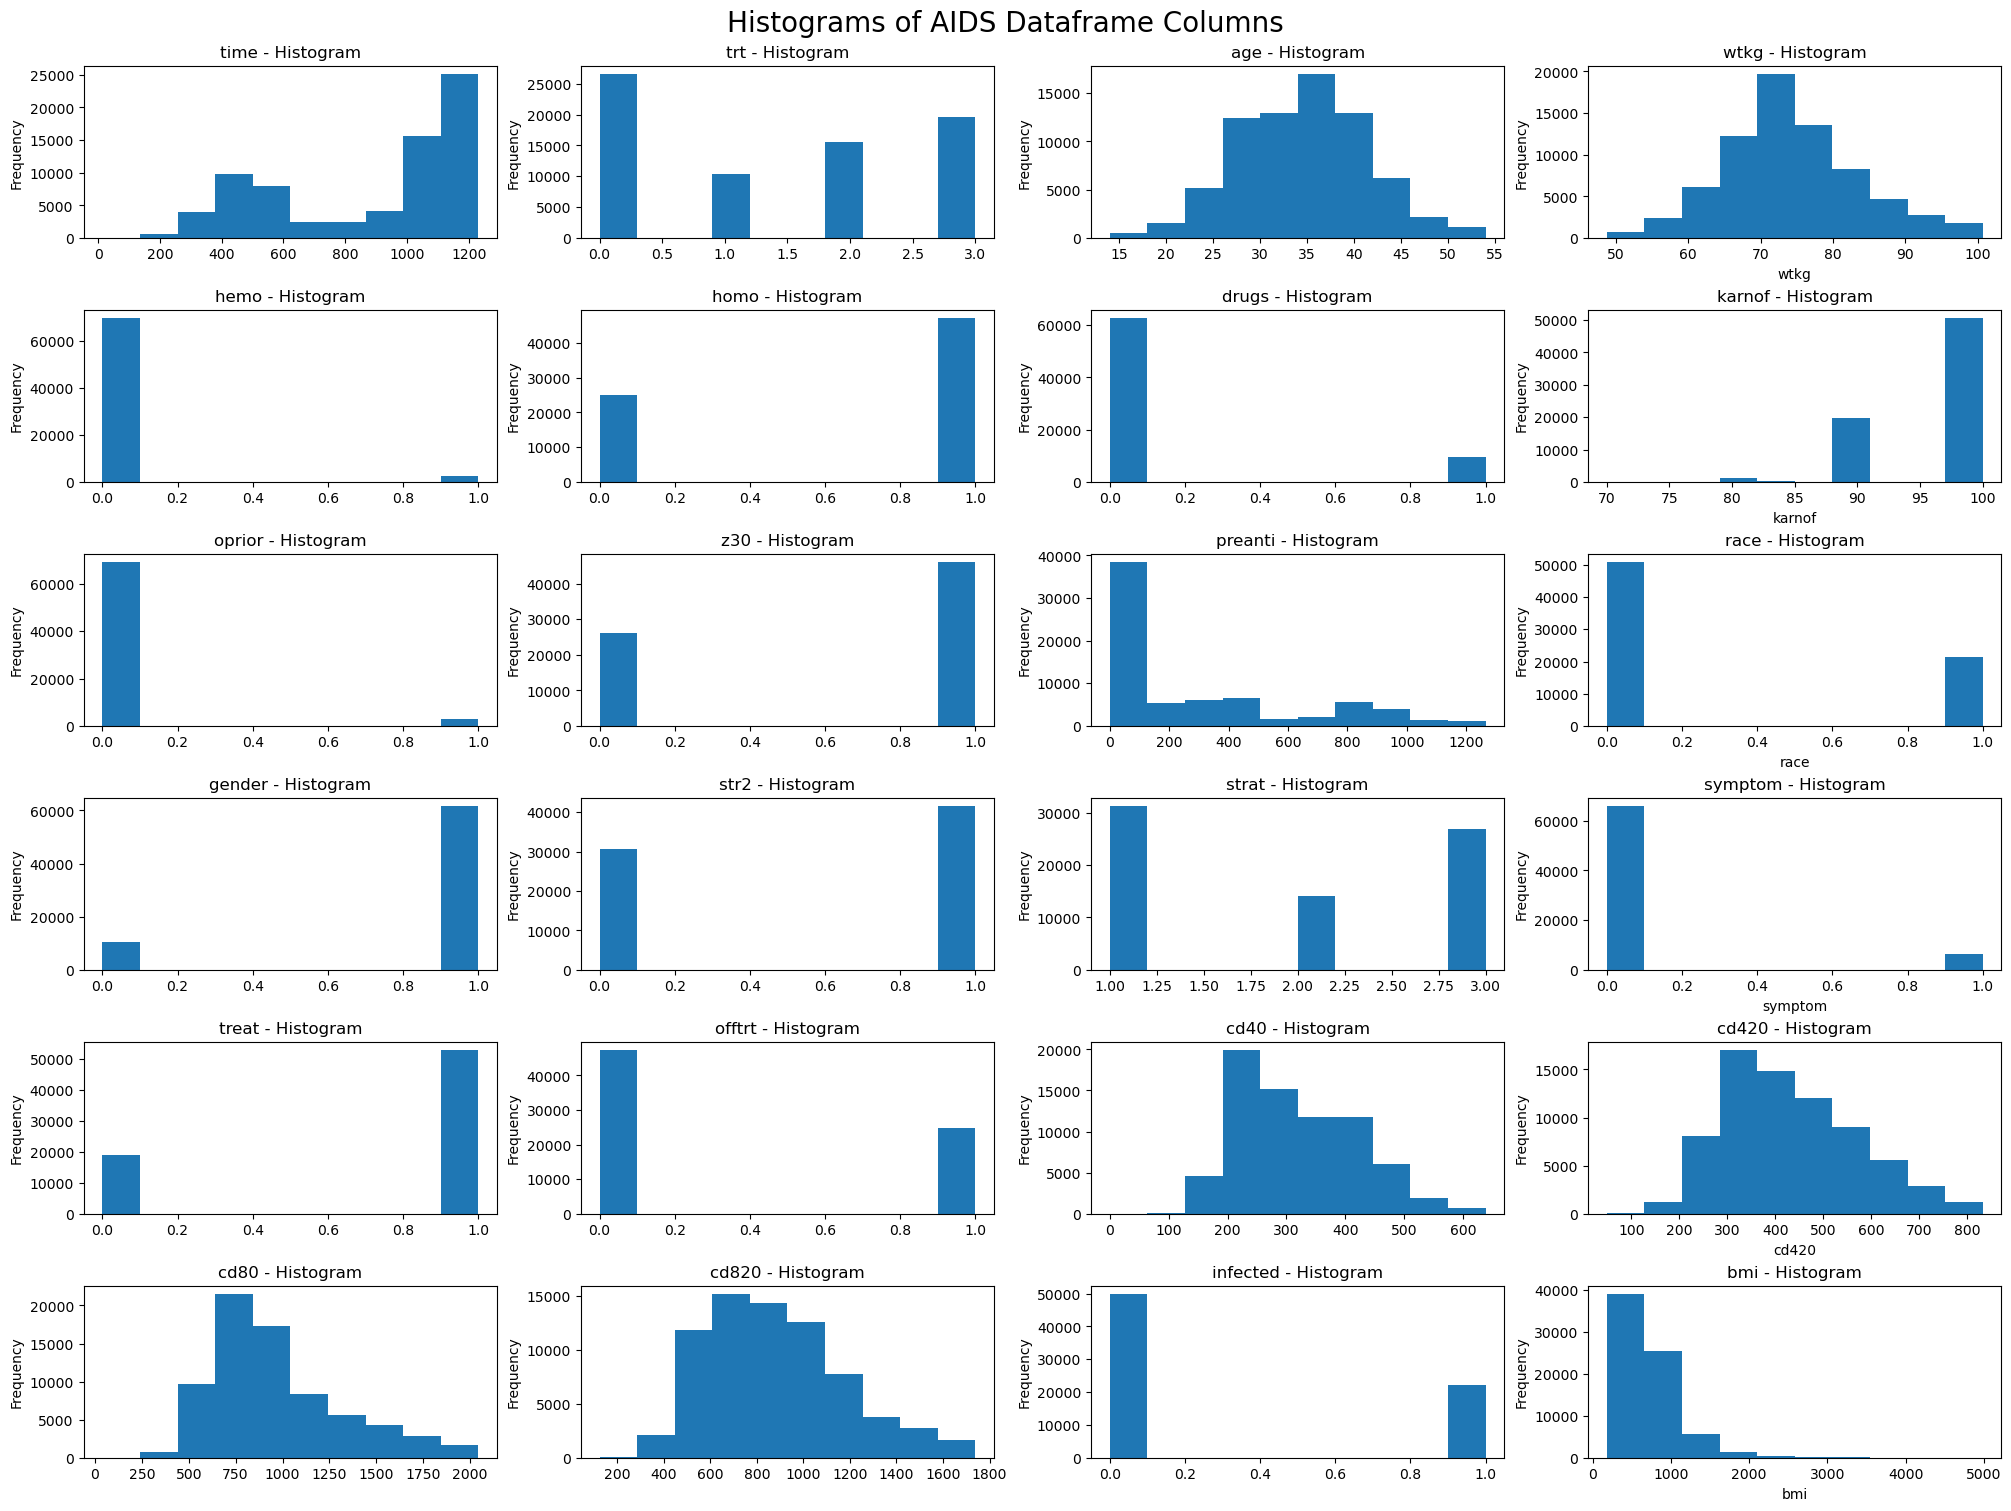

In [60]:
import matplotlib.pyplot as plt

# Assuming your data is in a dataframe called 'aids'

fig, axes = plt.subplots(6, 4, figsize=(20, 15), constrained_layout=True)  # Adjust rows/cols as needed
axes = axes.flatten()  # Flatten the array of axes

# Counter to keep track of subplot position
counter = 0

# Loop through each column
for col in aids.columns:
  # Create subplot for histogram
  plt.subplot(6, 4, counter+1)
  plt.hist(aids[col])
  plt.title(col + " - Histogram")
  plt.xlabel(col)
  plt.ylabel("Frequency")

  # Hide extra x-axis labels for clarity (optional)
  if (counter + 1) % 4 != 0:  # Hide every subplot except the first in each row
      plt.xlabel("")

  counter += 1  # Increment counter by 1 for each column (1 for histo)

# Remove any empty subplots if there are less columns than total plots
if counter < len(axes):
  for i in range(counter, len(axes)):
    fig.delaxes(axes[i])

# Display the plot
plt.suptitle('Histograms of AIDS Dataframe Columns', fontsize=20)
plt.show()


> ## Box Plot

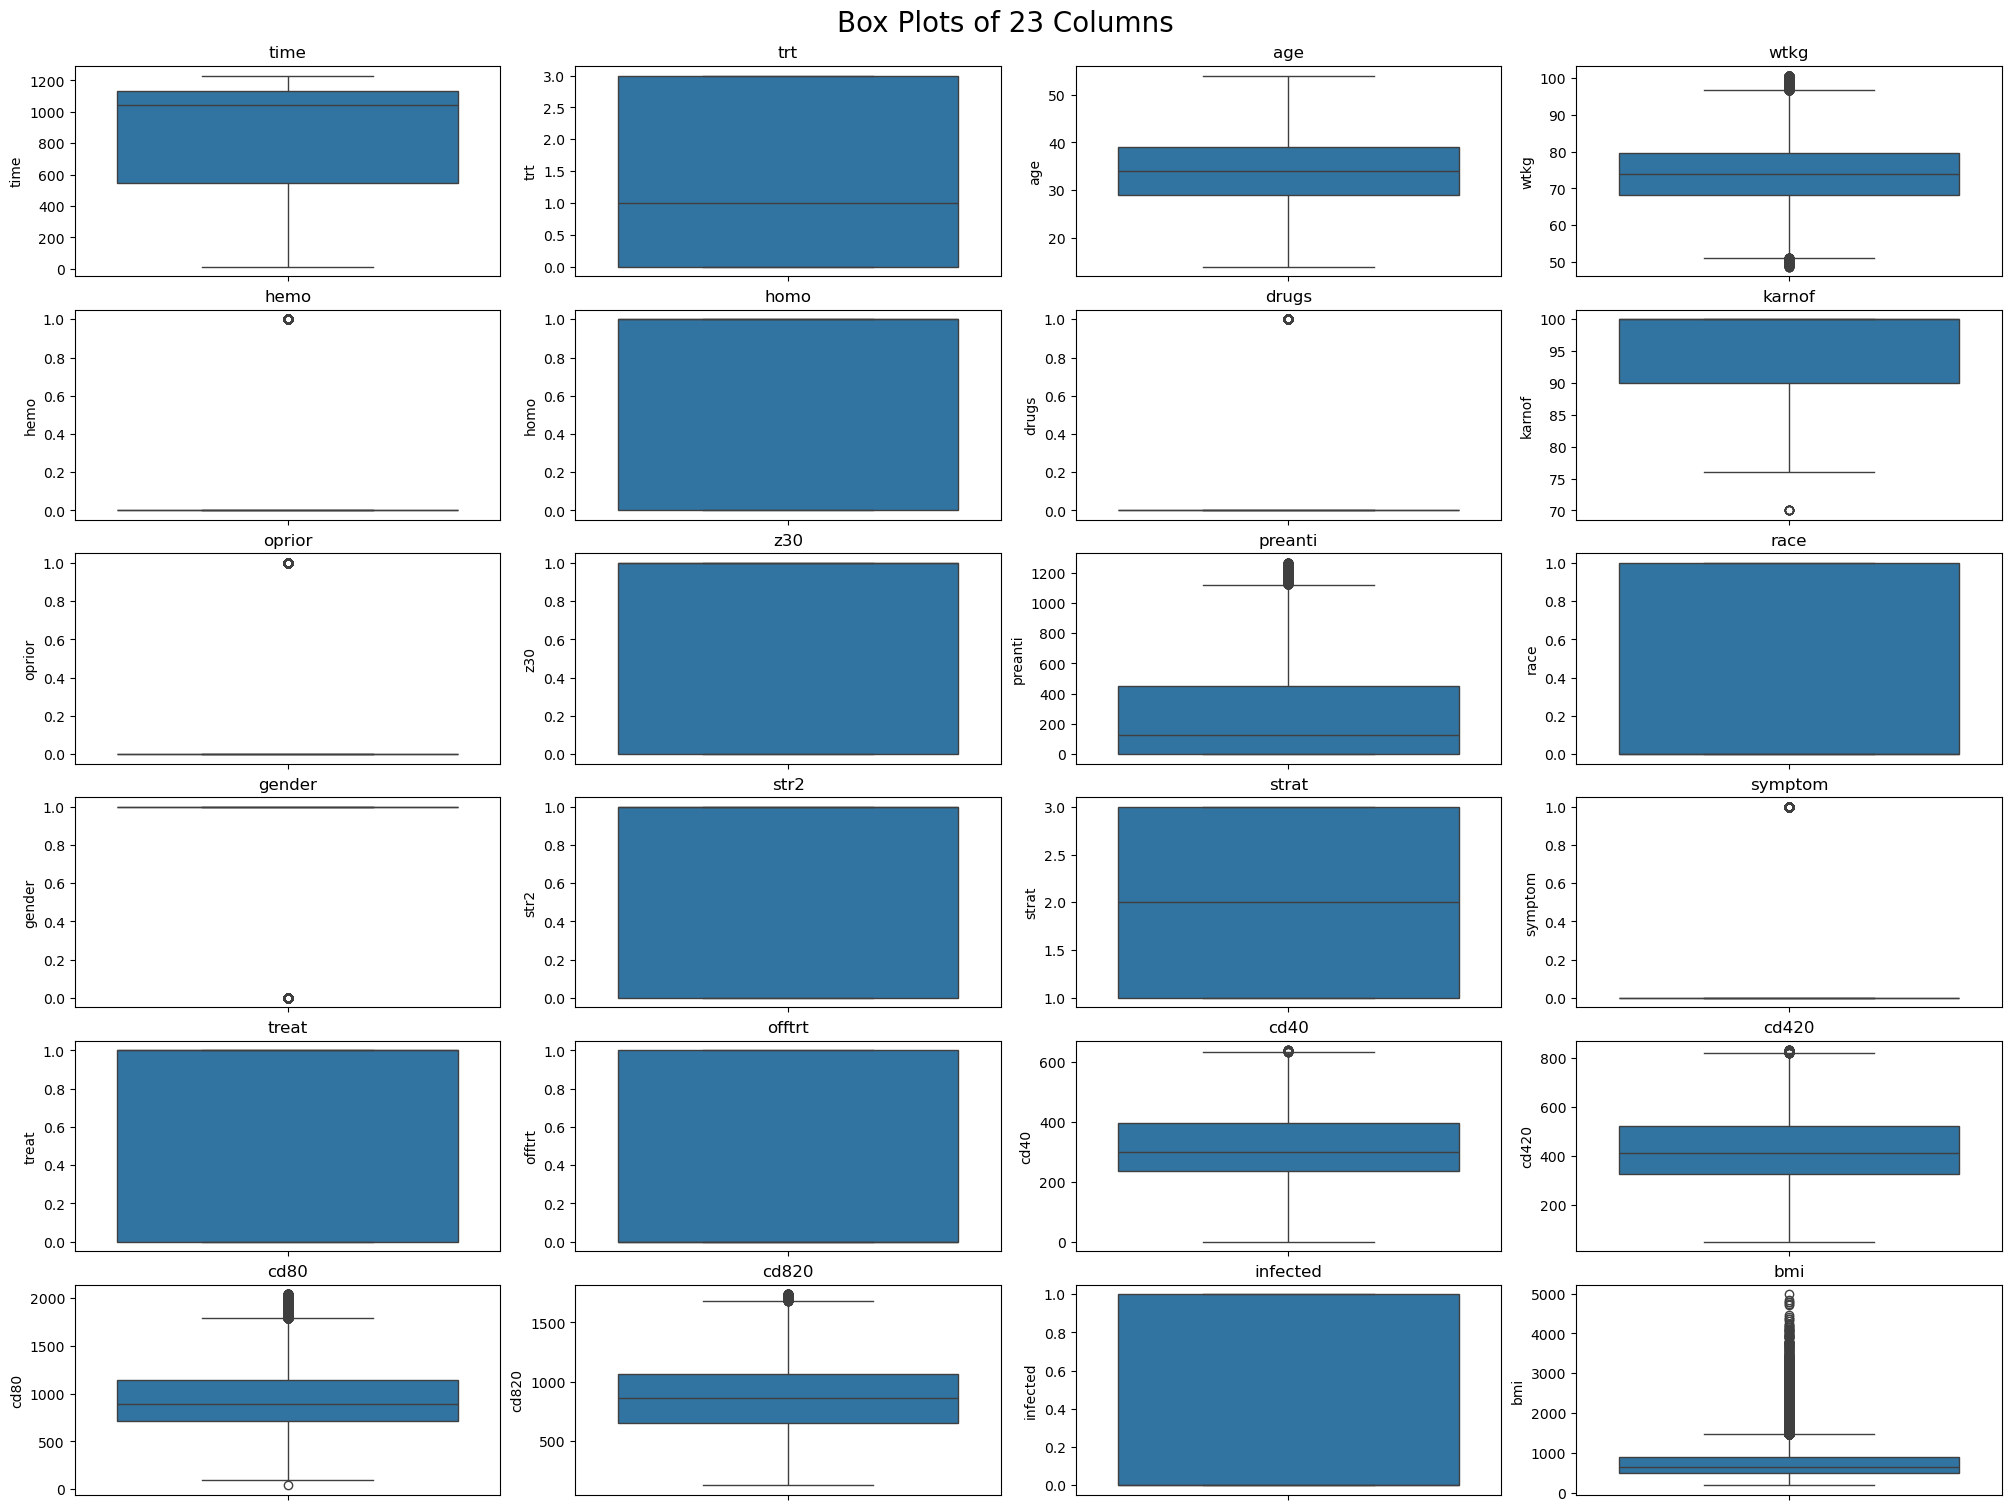

In [61]:
fig, axes = plt.subplots(6, 4, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()  # Flatten the array of axes

# Plot each column in a separate subplot
for i, col in enumerate(aids.columns):
    sns.boxplot(y=aids[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Display the plot
plt.suptitle('Box Plots of 23 Columns', fontsize=20)
plt.show()

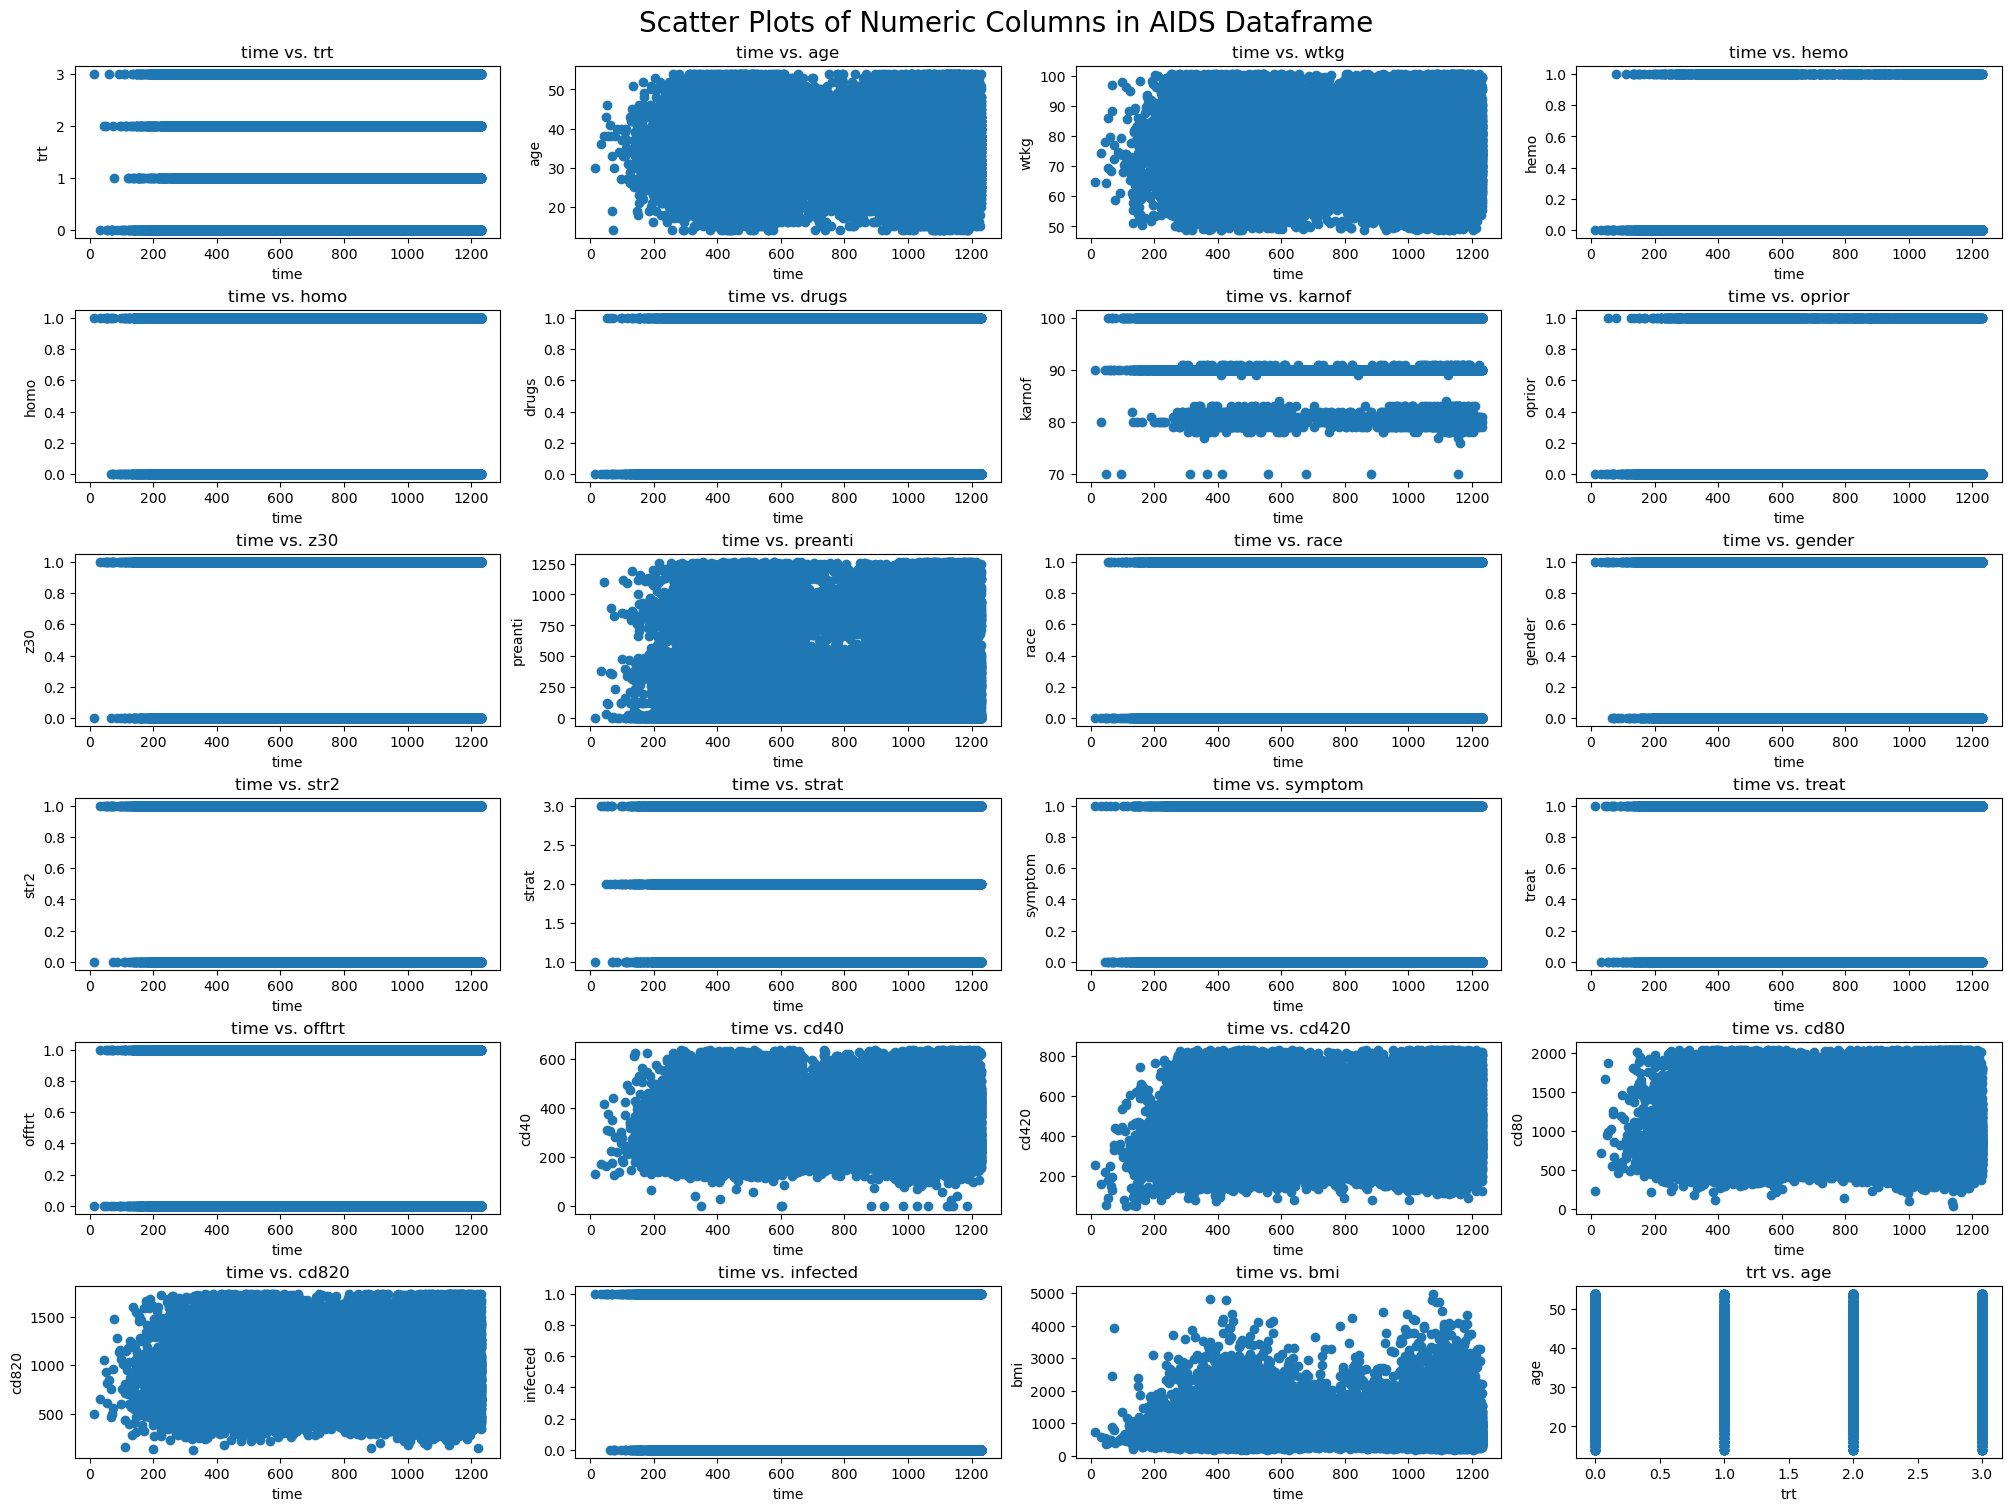

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a dataframe called 'aids'

# Identify numeric columns
numeric_cols = aids.select_dtypes(include=[np.number]).columns

# Configure subplots (adjust rows/cols as needed)
fig, axes = plt.subplots(len(numeric_cols) // 4, 4, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()  # Flatten the array of axes

# Counter to keep track of subplot position
counter = 0

# Loop through each combination of numeric columns (excluding the diagonal)
for i in range(len(numeric_cols)):
  for j in range(i+1, len(numeric_cols)):
    col1, col2 = numeric_cols[i], numeric_cols[j]

    # Create subplot for scatter plot (check if there's space)
    if counter < len(axes):
      plt.subplot(len(numeric_cols) // 4, 4, counter+1)
      plt.scatter(aids[col1], aids[col2])
      plt.title(col1 + " vs. " + col2)
      plt.xlabel(col1)
      plt.ylabel(col2)
    else:
      break  # Stop creating plots if all subplots are used

    counter += 1  # Increment counter by 1 for each combination

# Remove any extra subplots (optional)
if counter < len(axes):
  for i in range(counter, len(axes)):
    fig.delaxes(axes[i])

# Display the plot
plt.suptitle('Scatter Plots of Numeric Columns in AIDS Dataframe', fontsize=20)
plt.show()


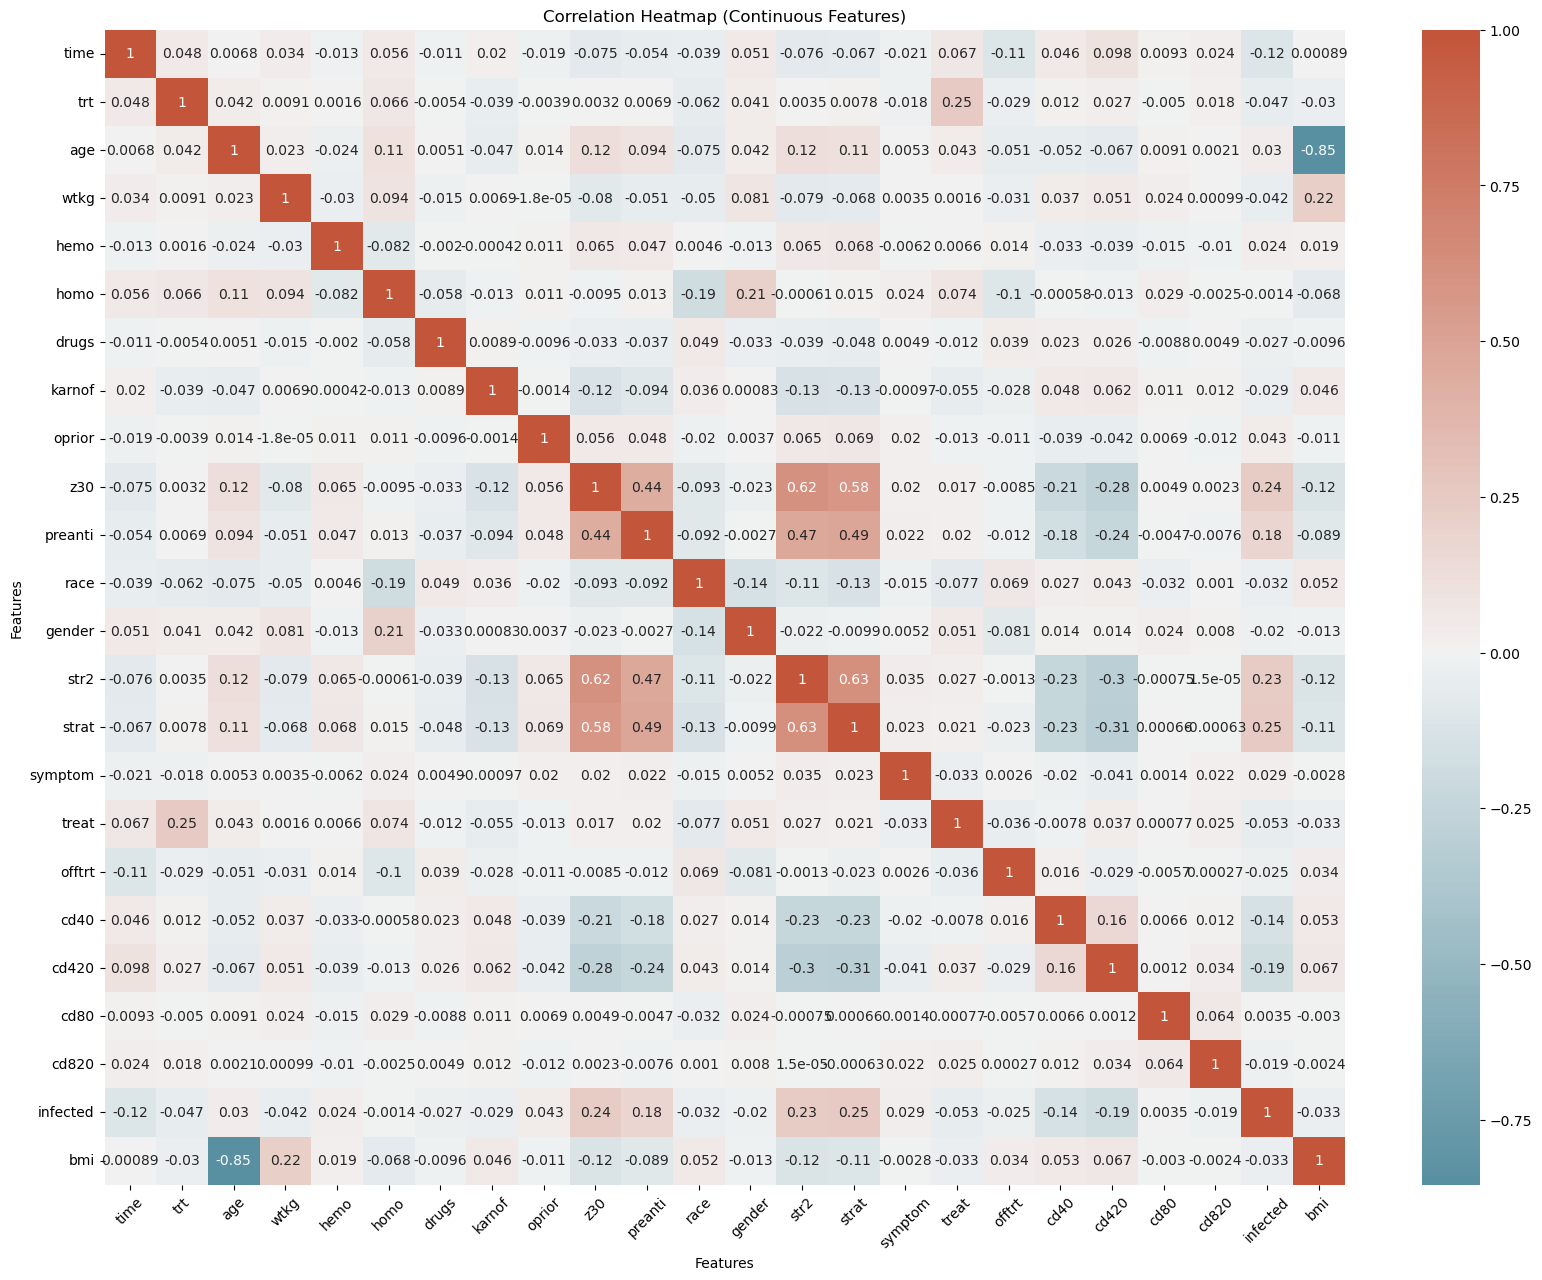

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

# Assuming your data is in a dataframe called 'aids'

# Identify continuous columns (assuming numerical implies continuous here)
# If you have more specific criteria for continuity, adjust the check
continuous_cols = [col for col in aids.columns if is_numeric_dtype(aids[col])]

# Create a correlation matrix for continuous columns
corr_matrix = aids[continuous_cols].corr()

# Define custom colormap for high (red) and low (blue) correlations
cmap = sns.diverging_palette(220, 20, n=256)  # Adjust palette numbers as needed

# Create a heatmap using seaborn with custom colormap
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, ax=ax)  # Set center to 0

# Add labels for better readability (optional)
ax.set_title("Correlation Heatmap (Continuous Features)")
ax.set_xlabel("Features")
ax.set_ylabel("Features")

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)
plt.show()


# Hypothesis Testing

> ## part1

>> ### Null Hypothesis (H₀): There is no significant difference in the average CD4+ T-cell counts (CD40, CD420) between HIV-infected individuals and non-infected individuals.
>> ### Alternative Hypothesis (H₁): HIV-infected individuals have a lower average CD4+ T-cell count compared to non-infected individuals.

In [64]:
import pandas as pd
from scipy import stats

# Assuming your data is in a dataframe called 'aids'

# Identify infected and non-infected individuals
infected = aids[aids['infected'] == 1]
non_infected = aids[aids['infected'] == 0]

# Select CD4+ T-cell count columns
cd4_cols = ['cd40']

# Perform t-test for each CD4+ T-cell count column
for col in cd4_cols:
  tstatistic, pvalue = stats.ttest_ind(infected[col], non_infected[col])

  # Print the results for each column
  print(f"\n**Hypothesis Test for {col}:**")
  print(f"Null Hypothesis (H₀): There is no significant difference in average {col} between infected and non-infected individuals.")
  print(f"Alternative Hypothesis (H₁): HIV-infected individuals have a lower average {col} compared to non-infected individuals.")
  print(f"t-statistic: {tstatistic:.4f}")
  print(f"p-value: {pvalue:.4f}")

  # Interpret the results based on significance level (usually alpha = 0.05)
  if pvalue < 0.05:
    print("We reject the null hypothesis. There is a statistically significant difference in average", col, "between infected and non-infected individuals.")
  else:
    print("We fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in average", col, "between infected and non-infected individuals.")




**Hypothesis Test for cd40:**
Null Hypothesis (H₀): There is no significant difference in average cd40 between infected and non-infected individuals.
Alternative Hypothesis (H₁): HIV-infected individuals have a lower average cd40 compared to non-infected individuals.
t-statistic: -38.5467
p-value: 0.0000
We reject the null hypothesis. There is a statistically significant difference in average cd40 between infected and non-infected individuals.


> ## 2nd Hypothesis

>>> ## Null Hypothesis (H₀): There is no significant correlation between body mass index (BMI) and HIV infection status.
>>> ## Alternative Hypothesis (H₁): There is a negative correlation between BMI and HIV infection status, meaning individuals with lower BMI are more likely to be infected with HIV.

In [65]:
import pandas as pd
from scipy import stats

# Assuming your data is in a dataframe called 'aids'

# Identify infected and non-infected individuals
infected = aids[aids['infected'] == 1]
non_infected = aids[aids['infected'] == 0]

# Select CD4+ T-cell count columns
col = 'cd420'

# Perform t-test for each CD4+ T-cell count column
for col in cd4_cols:
  tstatistic, pvalue = stats.ttest_ind(infected.loc[:,col], non_infected.loc[:,col])

  # Print the results for each column
  print(f"\n**Hypothesis Test for {col}:**")
  print(f"Null Hypothesis (H₀): There is no significant difference in average {col} between infected and non-infected individuals.")
  print(f"Alternative Hypothesis (H₁): HIV-infected individuals have a lower average {col} compared to non-infected individuals.")
  print(f"t-statistic: {tstatistic:.4f}")
  print(f"p-value: {pvalue:.4f}")

  # Interpret the results based on significance level (usually alpha = 0.05)
  if pvalue < 0.05:
    print("We reject the null hypothesis. There is a statistically significant difference in average", col, "between infected and non-infected individuals.")
  else:
    print("We fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in average", col, "between infected and non-infected individuals.")




**Hypothesis Test for cd40:**
Null Hypothesis (H₀): There is no significant difference in average cd40 between infected and non-infected individuals.
Alternative Hypothesis (H₁): HIV-infected individuals have a lower average cd40 compared to non-infected individuals.
t-statistic: -38.5467
p-value: 0.0000
We reject the null hypothesis. There is a statistically significant difference in average cd40 between infected and non-infected individuals.


## Label Encoding

In [66]:
# Encoding categorical variables
categorical_columns = ['trt', 'homo', 'drugs', 'race', 'gender', 'symptom', 'treat', 'offtrt']
aids = pd.get_dummies(aids, columns=categorical_columns, drop_first=True)
aids.head()

,time,age,wtkg,hemo,karnof,oprior,z30,preanti,str2,strat,cd40,cd420,cd80,cd820,infected,bmi,trt_1,trt_2,trt_3,homo_1,drugs_1,race_1,gender_1,symptom_1,treat_1,offtrt_1
0,948,48,89.8128,0,100,0,0,0,0,1,422,477,566,324,0,389.812500,False,True,False,False,False,False,False,False,True,False
1,1002,34,49.4424,0,90,0,1,895,1,3,162,218,392,564,1,427.702422,False,False,True,False,False,False,False,False,True,False
2,961,45,88.4520,0,90,0,1,707,1,3,326,274,887,858,0,436.800000,False,False,True,True,True,False,True,False,True,True
3,1166,47,85.2768,0,100,0,1,125,1,3,287,394,1590,966,0,386.042553,False,False,True,True,False,False,True,False,True,False
4,1090,43,66.6792,0,100,0,1,125,1,3,504,353,870,782,0,360.623039,False,False,False,True,False,False,True,False,False,False


## Transform the skewed Data

In [67]:

aids['log_preanti'] = np.log1p(aids['preanti'])
aids['log_cd40'] = np.log1p(aids['cd40'])
aids['log_cd420'] = np.log1p(aids['cd420'])
aids['log_cd80'] = np.log1p(aids['cd80'])
aids['log_cd820'] = np.log1p(aids['cd820'])


# Scaling the numetic Features

In [68]:
# Scaling numerical features
numerical_columns = ['age', 'wtkg', 'bmi', 'log_preanti', 'log_cd40', 'log_cd420', 'log_cd80', 'log_cd820']
scaler = StandardScaler()
aids[numerical_columns] = scaler.fit_transform(aids[numerical_columns])



# Ml Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your data is in a dataframe called 'aids' and target variable is 'infected'

# Features (replace with relevant features based on your choice)
features = aids.columns

# Split data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(aids.drop(columns='infected'), aids['infected'], test_size=0.2)

# Define a list of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(n_estimators=100))
    #('SVM (Linear Kernel)', SVC(kernel='linear')),
]

# Iterate through models and evaluate accuracy
for name, model in models:
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the testing set
  y_pred = model.predict(X_test)

  # Evaluate model performance
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{name} Accuracy: {accuracy:.2f}")


logistic regression: .84
random Forest: .89
